# RSA algorithm

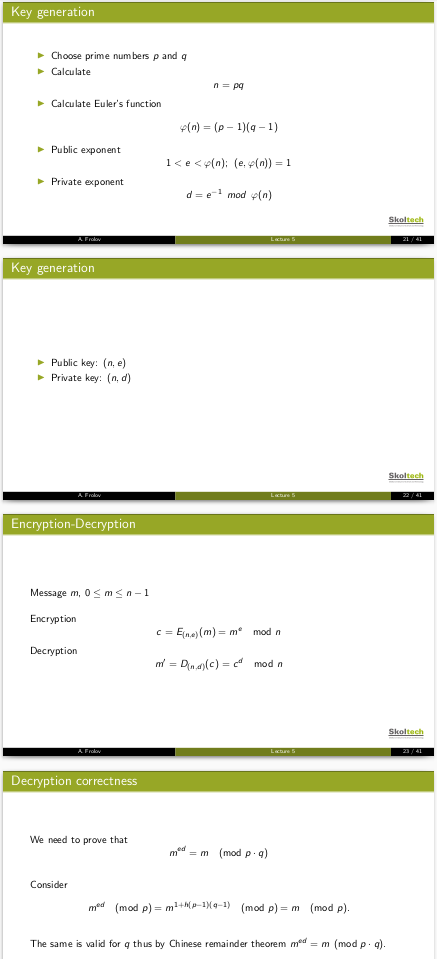

In [1]:
# Вычисление наибольшего общего делителя при помощи алгоритма Евклида

def gcd(a, b):
    # print(f"{a}\t{b}")
    if b == 0:
        return a
    a, b = sorted((a, b))
    return gcd(a, b % a)

In [2]:
a = 19 * 5 * 7 * 2
b = 19 * 3 * 11

gcd(a, b)

19

In [3]:
from math import sqrt


# Разложение числа на простые множители
def facrorize_number(n):
    max_p = sqrt(n)
    factors = {}
    
    while n % 2 == 0:
        # print(2)
        factors[2] = factors.get(2, 0) + 1
        n = n // 2

    p = 3
    while p < int(max_p) + 1:

        while n % p == 0:
            # print(p)
            factors[p] = factors.get(p, 0) + 1
            n = n // p
            max_p = sqrt(n)
            
        p += 2

    if n > 2:
        # print(n)
        factors[n] = factors.get(n, 0) + 1
            
    # print("done")
    return factors

In [4]:
# Вычисление фи-функции Эйлера (на основании её мультапликативности)
def compute_phi(n):
    phi = 1
    for x, i in facrorize_number(n).items():
        phi *= x**(i - 1) * (x - 1)
        
    return phi

In [5]:
# Эффективный алгоритм возведения в степень по модулю
def exponent(x, n, mod_p):
    if n == 1:
        return x % mod_p
    
    pow_x = exponent(x, n // 2, mod_p)
    if n % 2 == 0:
        return (pow_x * pow_x) % mod_p
    return (pow_x * pow_x * x) % mod_p

In [6]:
# Вычисление приватной экспоненты (пользуясь теоремой Эйлера)
def compute_private_exponent(e, phi_n):
    phi_phi = compute_phi(phi)
    return exponent(e, phi_phi - 1, phi)

In [11]:
# Функции для шифрования и дешифровки сообщения RSA

def encrypt(m, public_key):
    n, e = public_key
    if m >= n:
        raise ValueError("Encoded message cannot be bigger then n!")
    return exponent(m, e, n)


def decrypt(c, private_key):
    n, d = private_key
    return exponent(c, d, n)

In [10]:
# Функции для кодирования строки в число и обратного декодирования

STEP = 4

def encode_string(string):
    encoded_str = "".join([f"{ord(c):0>{STEP}}" for c in string])
    encoded_int = int(encoded_str.lstrip("0"))
    return encoded_int


def decode_number(number):
    number_str = str(number)
    pieces = [number_str[max(i-STEP, 0):i] for i in range(len(number_str), 0, -STEP)][::-1]
    numbers = [int(c.lstrip("0")) for c in pieces]
    return "".join([chr(i) for i in numbers])

## Пример использования

In [7]:
# Выбор простых p и q таких, чтобы n хватило для кодирования сообщения

p = 8653083809
q = 5994817067

n = p * q
print(f"n\t= {n}")
phi = (p - 1) * (q - 1)
print(f"phi(n)\t= {phi}")

n	= 51873654500374568203
phi(n)	= 51873654485726667328


In [8]:
# Выбор публичной экспоненты
e = 1234567

if gcd(e, phi) == 1:
    print(f"Public exponent: e = {e}")
else:
    print("e and phi(n) are not coprime! Try another e < phi(n)")

Public exponent: e = 1234567


In [9]:
# Вычисление приватной экспоненты
d = compute_private_exponent(e, phi)
print(f"Private exponent: d = {d}")

Private exponent: d = 21783651621645591863


In [12]:
message = "Hello"

public_key = (n, d)
private_key = (n, e)


print(f"Original message:\t{message}")
m = encode_string(message)
print(f"Encoded message:\t{m}")
c = encrypt(m, public_key)
print(f"Encrypted message:\t{c}")
m_d = decrypt(c, private_key)
print(f"Decrypted message:\t{m_d}")
msg = decode_number(m_d)
print(f"Decoded message:\t{msg}")

Original message:	Hello
Encoded message:	720101010801080111
Encrypted message:	17561592825168476309
Decrypted message:	720101010801080111
Decoded message:	Hello


## Для отважных

In [ ]:
# Предположим, что нам известен лишь публичный ключ.
# Попробуем рассчитать phi(n) для получения приватного ключа (для больших n получится вряд ли, но попробовать можно!)

facrorize_number(n)